# **CS357000 Introduction to Multimedia - HW1**

In this homework, you'll be engaging with fundamental concepts of image processing, including 
+   image interpolation
+   enhancement
+   compression  

Each question is designed to build your understanding and skills in these areas.   
Follow the instructions carefully and complete the tasks in the provided code blocks.  
Additionally, you will be required to write a report in the designated sections to explain your methodology and findings.  

# **Submission**
+   Ensure that you have completed all tasks and filled in all reports before submitting.
+   Submit your Jupyter Notebook (**HW1_xxxxxxxxx_ooo.ipynb file where xxxxxxxxx is yout ID and ooo is your name**) through **eeclass** before the deadline. 


In [43]:
# Lib
# !pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Question 1 - Image Interpolation (30%)**
Write the image interpolation function to upsample the given image to 8 times the original width and height.   
Implement the following two different interpolation methods and show the 8X (both x and y directions) upsampled image.   
(You should not use any built-in function for the interpolation.)

In [67]:
def Interpolation_bilnear(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply bilinar interpolation to img
    origin_height, origin_width = img.shape[0], img.shape[1]
    height, width = origin_height * 8, origin_width * 8
    img_out = np.zeros((height, width, 3), dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            position_i, position_j = i / 8, j / 8 # floating point
            upper_i, lower_i = int(position_i), int(position_i) + 1
            left_j, right_j = int(position_j), int(position_j + 1)
            if(position_i < origin_height - 1  and position_j < origin_width - 1):
                left_upper = img[upper_i, left_j] * (lower_i - position_i) * (right_j - position_j)
                right_upper = img[upper_i, right_j] * (lower_i - position_i) * (position_j - left_j)
                left_lower = img[lower_i, left_j] * (position_i - upper_i) * (right_j - position_j)
                right_lower = img[lower_i, right_j] * (position_i - upper_i) * (position_j - left_j)
                img_out[i, j] = left_upper + right_upper + left_lower + right_lower
            elif(position_i < origin_height - 1 and position_j >= origin_width - 1):
                left_upper = img[upper_i, left_j] * (lower_i - position_i)
                left_lower = img[lower_i, left_j] * (position_i - upper_i)
                img_out[i, j] = left_upper + left_lower
            elif(position_i >= origin_height - 1 and position_j < origin_width - 1):
                left_upper = img[upper_i, left_j] * (right_j - position_j)
                right_upper = img[upper_i, right_j] * (position_j - left_j)
                img_out[i, j] = left_upper + right_upper
            elif(position_i >= origin_height - 1 and position_j >= origin_width - 1):
                img_out[i, j] = img[upper_i, left_j]

    return img_out

def Interpolation_NearestNeighbor(img):
    '''
    In :
        img : image before interpolation
    Out : 
        img_out : image after interpolation
    '''
    # TODO apply Nearest Neighbor interpolation to img
    height, width = img.shape[0] * 8, img.shape[1] * 8
    img_out = np.zeros((height, width, 3), dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            x, y = int(i / 8), int(j / 8)
            img_out[i, j] = img[x, y]

    return img_out

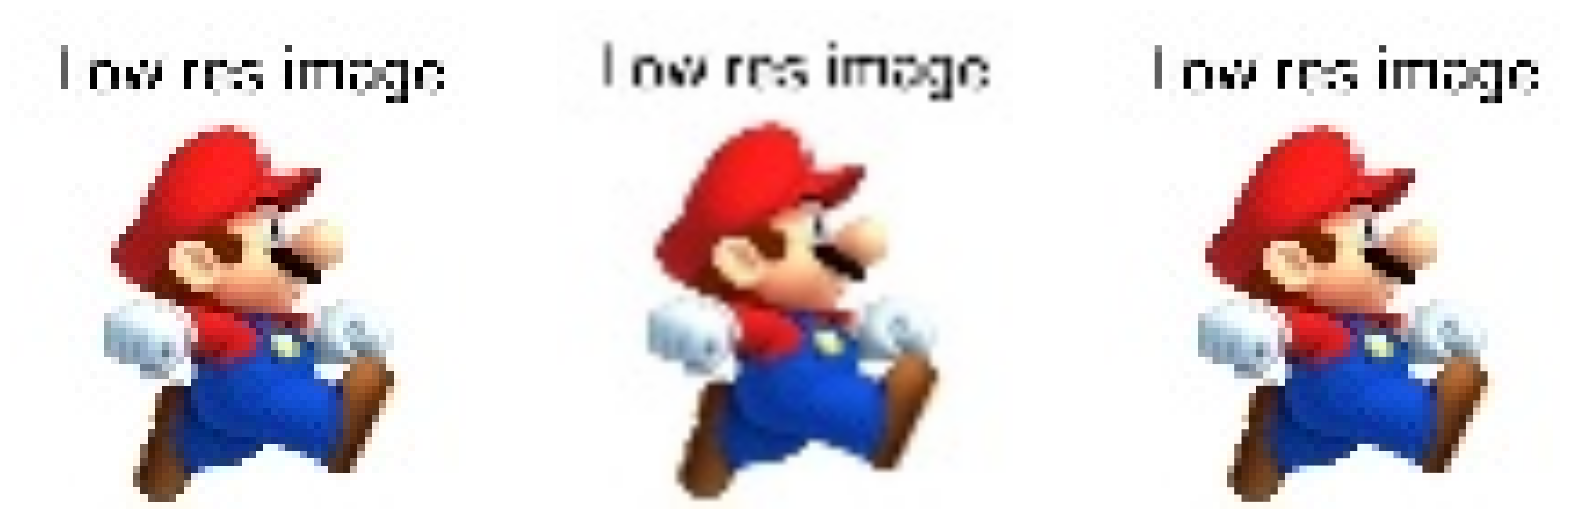

In [68]:
# main code
fig, ax=plt.subplots(1,3,figsize=(20, 20))
# read image
img=cv2.imread('./src/mario.jpg')
# apply bilinear interpolation
bi_img=Interpolation_bilnear(img.copy())
# apply nearest neighbor interpolation
nn_img=Interpolation_NearestNeighbor(img.copy())
# show 
ax[0].axis('off')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].imshow(cv2.cvtColor(bi_img, cv2.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].imshow(cv2.cvtColor(nn_img, cv2.COLOR_BGR2RGB))

# Compare result and write down you observation
TODO ......


## **Question 2 - Image enhencement (30%)**
implement the following steps to correct the image **dark room**. (You cannot use any built-in functions to perform the enhancement procedure)

In [2]:
def RGB2YIQ(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YIQ conversion to img
    img_out=img.copy()
    return img_out
def YIQ2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YIQ conversion to img
    img_out=img.copy()
    return img_out
def gamma_enhencement(img,gamma):
    '''
    In :
        img : image before enhancement
        gamma : hyperparameter for enhancement
    Out : 
        img_out : image after enhancement
    '''
    # TODO apply gamma enhancement to img
    img_out=img.copy()
    return img_out

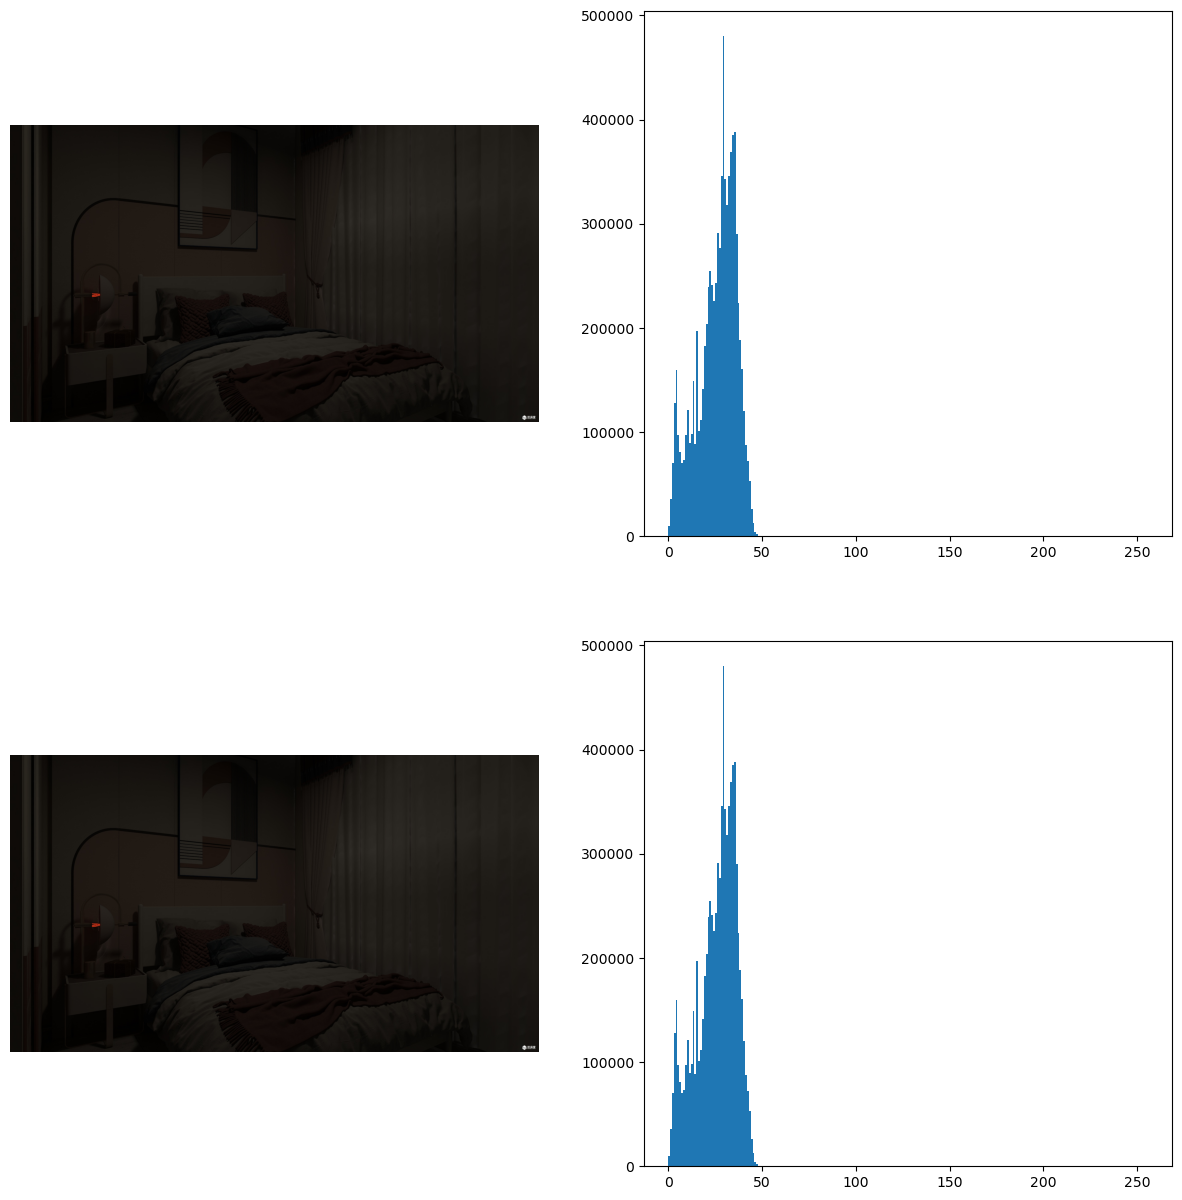

In [3]:
# main code
fig, ax=plt.subplots(2,2,figsize=(15,15))
# read image
img=cv2.imread('./src/darkroom.jpg')
# convert BGR to RGB
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# show image
ax[0][0].axis('off')
ax[0][0].imshow(img)
# apply RGB to YIQ conversion
img_yiq=RGB2YIQ(img.copy())
#show y channel's histogram before enhancement
_=ax[0][1].hist(img_yiq[:,:,0].ravel(),256,[0,256])

# apply gamma enhancement 
# TODO adjuest the suitable gamma value
gamma=1.5
ehence_img=gamma_enhencement(img_yiq.copy(),1.5)
# apply YIQ to RGB conversion
enhence_img_rgb=YIQ2RGB(ehence_img.copy())

# show the emhanced image
ax[1][0].axis('off')
ax[1][0].imshow(enhence_img_rgb)
#show y channel's histogram after enhancement
_= ax[1][1].hist(ehence_img[:,:,0].ravel(),256,[0,256])


# Compare result and write down you observation
TODO ......


## **Question 3 - Image Compression (30%)**
Transform the image tokyo.jpg from spatial domain to frequency domain with DCT   
for compression and reconstruct the compressed image using inverse DCT with reduced numbers 
and bits of DCT coefficients.  


## Remark
**For DCT transformation you can use cv2.dct and cv2.idct**

In [11]:
Luminance_Qtable=([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 36, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

Chrominance_Qtable=np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
])

def PSNR(img1, img2):
    '''
    In :
        img1 : source image
        img2 : target image
    Out : 
        psnr : PSNR value
    '''
    # TODO calculate PSNR value
    psnr=0
    return psnr

def RGB2YCbCr(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply RGB to YCbCr conversion to img
    img_out=img.copy()
    return img_out

def YCbCr2RGB(img):
    '''
    In :
        img : image before conversion
    Out : 
        img_out : image after conversion
    '''
    # TODO apply YCbCr to RGB conversion to img
    img_out=img.copy()
    return img_out
def upsample2(img):
    '''
    In :
        img : image before upsampling
    Out : 
        img_out : image after upsampling
    '''
    # TODO apply upsampling to img
    img_out=img.copy()
    return img_out
def Chromanance_subsample(img):
    '''
    In :
        img : Ycbcr image before subsampling
    Out : 
        Y : Y channel
        Cb: Cb channel
        Cr: Cr channel
    '''
    # TODO apply chromanance subsampling to img
    img_out=img.copy()
    return img_out,img_out,img_out
def Patch_DCT_with_Quantization(img,Qtable):
    '''
    In :
        img : image before DCT and quantization
        Qtable : quantization table
    Out : 
        img_out : image after DCT and quantization
    '''
    # TODO apply DCT and quantization to img
    img_out=img.copy()
    return img_out
def Patch_iDCT_with_Dequantization(img,Qtable):
    '''
    In :
        img : image before DCT and quantization
        Qtable : quantization table
    Out : 
        img_out : image after iDCT and dequantization
    '''
    # TODO apply DCT and quantization to img
    img_out=img.copy()
    return img_out


The PSNR after subsampling is  0
The compression rate after subsampling is  0
The rate of nonezeros in the compressed image is  0
the PSNR after DCT compression is  0


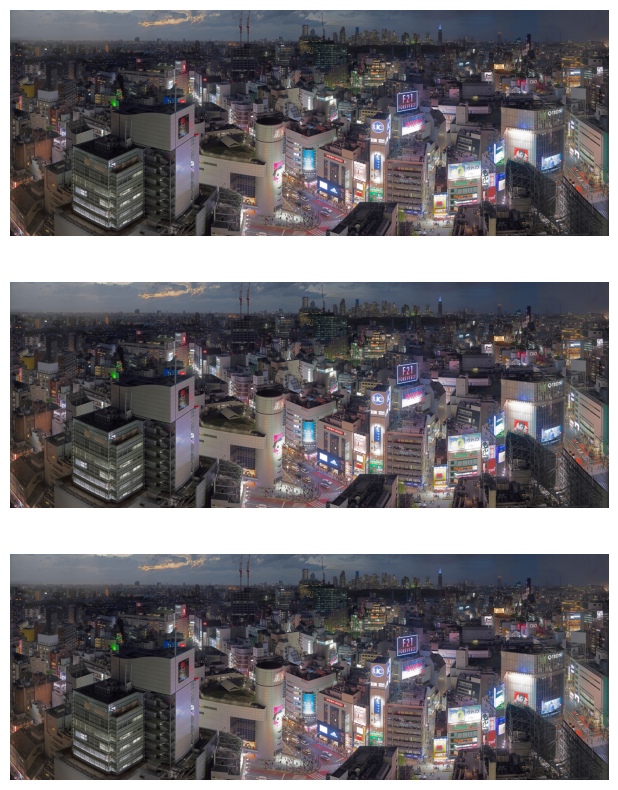

In [15]:
# main code
fig, ax=plt.subplots(3,1,figsize=(10,10))

# read image
img=cv2.imread('./src/tokyo.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_byte=img.shape[0]*img.shape[1]*img.shape[2]
# show original image
ax[0].axis('off')
ax[0].imshow(img)
# convert RGB to Ycbcr
ycbcr_img=RGB2YCbCr(img.copy())
# Chrominance subsampling with 4:2:0
Y,Cb,Cr=Chromanance_subsample(ycbcr_img)
# upsample Cb and Cr channels
up_Cb=upsample2(Cb)
up_Cr=upsample2(Cr)
#TODO merge Y, up_Cb, up_Cr channels and transform back to RGB
compressed_img=img.copy()
# show the compressed image
ax[1].axis('off')
ax[1].imshow(compressed_img)
# calculate the PSNR after reconstruction
psnr=PSNR(img,compressed_img)
print("The PSNR after subsampling is ",psnr)
#TODO calculate compression ratio after subsampling
compression_ratio=0
print("The compression ratio after subsampling is ",compression_ratio)
# apply DCT and quantization to Y channel
compressed_Y=Patch_DCT_with_Quantization(Y,Luminance_Qtable)
# apply DCT and quantization to Cb channel
compressed_Cb=Patch_DCT_with_Quantization(Cb,Chrominance_Qtable)
# apply DCT and quantization to Cr channel
compressed_Cr=Patch_DCT_with_Quantization(Cr,Chrominance_Qtable)

# TODO calculate the rate of nonezeros in the compressed image
rate=0
print("The rate of nonezeros in the compressed image is ",rate)

#apply inverse DCT and dequantization to Y channel
recover_Y=Patch_iDCT_with_Dequantization(compressed_Y,Luminance_Qtable)
#apply inverse DCT and dequantization to Cb channel
recover_Cb=Patch_iDCT_with_Dequantization(compressed_Cb,Chrominance_Qtable)
#apply inverse DCT and dequantization to Cr channel
recover_Cr=Patch_iDCT_with_Dequantization(compressed_Cr,Chrominance_Qtable)

# Todo upsample and merge Y, Cb, Cr channels and transform back to RGB

recover_img=img.copy()
ax[2].axis('off')
ax[2].imshow(recover_img)
# calculate the PSNR value
psnr=PSNR(img,recover_img)
print("the PSNR after DCT compression is ",psnr)
